In [1]:
from numpy import zeros
from random import randint
from random import random
from matplotlib import pyplot

# generate the next frame in the sequence
def next_frame(last_step, last_frame, column):
    # define the scope of the next step
    lower = max(0, last_step-1)
    upper = min(last_frame.shape[0]-1, last_step+1)
    # choose the row index for the next step
    step = randint(lower, upper)
    # copy the prior frame
    frame = last_frame.copy()
    # add the new step
    frame[step, column] = 1
    return frame, step
    
def build_frames(size):
    frames = list()
    # create the first frame
    frame = zeros((size,size))
    step = randint(0, size-1)
    # decide if we are heading left or right
    right = 1 if random() < 0.5 else 0
    col = 0 if right else size-1
    frame[step, col] = 1
    frames.append(frame)
    # create all remaining frames
    for i in range(1, size):
        col = i if right else size-1-i
        frame, step = next_frame(step, frame, col)
        frames.append(frame)
    return frames, right

size = 5
frames, right = build_frames(size)
# plot all feames
pyplot.figure()
for i in range(size):
    # create a grayscale subplot for each frame
    pyplot.subplot(1, size, i+1)
    pyplot.imshow(frames[i], cmap="Greys")
    # turn of the scale to make it cleaer
    ax = pyplot.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# show the plot
pyplot.show()


<Figure size 640x480 with 5 Axes>

In [39]:
#prepare input for model
# generate multiple sequences of frames and reshape for network input
def generate_examples(size, n_patterns):
    X, y = list(), list()
    for _ in range(n_patterns):
        frames, right = build_frames(size)
        X.append(frames)
        y.append(right)
    # resize as [samples, timesteps, width, height, channels]
    X = np.reshape(X,(n_patterns, size, size, size, 1))
    y = np.reshape(y,(n_patterns, 1))
    return X, y

In [68]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed

# configure problem
size = 50
# define the model
model = Sequential()
model.add(TimeDistributed(Conv2D(2, (2,2), activation= "relu" ),
input_shape=(None,size,size,1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(Dense(1, activation= "sigmoid" ))
model.compile(loss= "binary_crossentropy" , optimizer= "adam" , metrics=[ "acc" ])
print(model.summary())

W0823 11:09:25.844524 140312546113344 deprecation_wrapper.py:119] From /home/batonfabi/venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 11:09:25.881695 140312546113344 deprecation_wrapper.py:119] From /home/batonfabi/venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 11:09:25.997856 140312546113344 deprecation_wrapper.py:119] From /home/batonfabi/venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0823 11:09:26.448404 140312546113344 deprecation_wrapper.py:119] From /home/batonfabi/venv/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0823 11:09:26.482942 140312546113

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, None, 49, 49, 2)   10        
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 24, 24, 2)   0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 1152)        0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                240600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 240,661
Trainable params: 240,661
Non-trainable params: 0
_________________________________________________________________
None


In [73]:
# fit model
X, y = generate_examples(size, 5000)
model.fit(X, y, batch_size=32, epochs=1)


Epoch 1/1
5000/5000 [==============================] - 60s 12ms/step - loss: 0.6123 - acc: 0.6540


In [80]:
# evaluate model
X, y = generate_examples(size, 100)
loss, acc = model.evaluate(X, y, verbose=0)
print( "loss: %f, acc: %f" % (loss, acc*100))

loss: 0.171019, acc: 99.000000


In [82]:
# prediction on new data
X, y = generate_examples(size, 1)
yhat = model.predict_classes(X, verbose=0)
expected = "Right" if y[0]==1 else "Left"
predicted = "Right" if yhat[0]==1 else "Left"
print( "Expected: %s, Predicted: %s" % (expected, predicted))

Expected: Left, Predicted: Left


In [85]:

X, y = generate_examples(size, 5000)
np.shape(X)

(5000, 50, 50, 50, 1)

In [84]:
np.shape(y)

(1, 1)

In [2]:
######### Birdstuff
###########
########
import soundfile
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import platform

In [3]:
def transform_to_fft2(y):
    hop =512
    n_fft =512
    win_length =512
    fft = librosa.stft(y, n_fft, hop, win_length, "hann")
    fft = np.real(fft)
    fft = np.array(np.split(fft,8,axis=1))
    #fft = np.reshape(fft,(8, 257, 47,1))
    return fft

In [4]:

if platform.platform().find("fedora") != -1:
    data_path = "/home/batonfabi/Music/0006d67e88d79fd14117aa03ea95ed6479b08ac9.mp3-0.wav"
else:
    data_path = "/home/jovyan/wav/Barn Swallow /002bf61951861c0173a6d3d6947f6ae0501b5b67.mp3.wav"

y, sr = soundfile.read(data_path,start=0, stop=32000*6)
S = transform_to_fft2(y)


In [46]:
np.shape(S)

(14, 257, 28)

In [168]:
S2 = np.array(np.split(S,8,axis=1))


In [169]:
np.shape(S2)

(8, 257, 47)

In [170]:
type(S2)

numpy.ndarray

In [174]:
S3 = np.column_stack((S2[0,:,:],S2[1,:,:],S2[2,:,:],S2[3,:,:],
                      S2[4,:,:],S2[5,:,:],S2[6,:,:],S2[7,:,:],
                     ))
np.shape(S2)

(8, 257, 47)

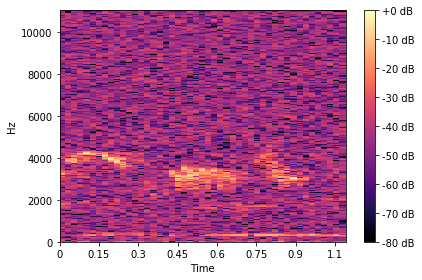

In [184]:
#plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(S2[3,:,:], ref=np.max), y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()


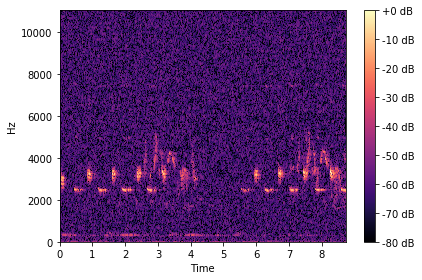

In [166]:
#plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()


In [139]:
S2 = np.split(S,4,axis=1)

In [141]:
np.shape(S2)

(4, 257, 94)

array([[ 0.        ,  0.        ,  0.        , ..., -0.10351393,
         0.36563638, -0.28871316],
       [ 0.22745913, -0.17374757,  0.07213606, ..., -0.051241  ,
        -0.24346627,  0.1929906 ],
       [-0.43975875,  0.50494164, -0.20503217, ...,  0.10271479,
         0.0310998 , -0.02111455],
       ...,
       [-0.0445411 ,  0.02552645,  0.08042031, ..., -0.01822635,
        -0.03685312, -0.10099313],
       [ 0.13030745, -0.03315549, -0.06323143, ...,  0.12232187,
         0.13882673,  0.07354456],
       [-0.08828589, -0.03727163,  2.4996104 , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [23]:
### mel-drop -sectrogram

from keras.models import Sequential

import keras

from keras import layers
from keras import models
from keras import optimizers
from keras.layers import TimeDistributed

sr = 32000

#input_shape=(None,size,size,1)))


model2 = models.Sequential()
model2.add(TimeDistributed(layers.Conv2D(8, (3, 3), activation='relu'),input_shape=(None, 257, 28,1)))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Conv2D(16, (3, 3), activation='relu')))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu')))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu')))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Flatten()))
model2.add(layers.LSTM(50))
model2.add(layers.Dense(72, activation='softmax'))
model2.summary()

model2.compile(loss= "categorical_crossentropy" , optimizer= "adam" , metrics=[ "acc" ])





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_30 (TimeDis (None, None, 255, 45, 8)  80        
_________________________________________________________________
time_distributed_31 (TimeDis (None, None, 127, 22, 8)  0         
_________________________________________________________________
time_distributed_32 (TimeDis (None, None, 125, 20, 16) 1168      
_________________________________________________________________
time_distributed_33 (TimeDis (None, None, 62, 10, 16)  0         
_________________________________________________________________
time_distributed_34 (TimeDis (None, None, 60, 8, 32)   4640      
_________________________________________________________________
time_distributed_35 (TimeDis (None, None, 30, 4, 32)   0         
_________________________________________________________________
time_distributed_36 (TimeDis (None, None, 28, 2, 64)   18496     
__________

In [4]:
import lstm_datagen as rr
import librosa
import numpy as np


slice_length = 6  # seconds
desired_semplerate = 32000
data_path = "/home/jovyan/wav/"
debug = False
rewrite_npy = False
shuffle = True


datagen = rr.RawWavDataGenerator(data_path, slice_length, desired_semplerate, 
                                 0.85, 40, 1, shuffle, 
                                 transform_to_fft2,9, debug, rewrite_npy)
       

train_generator,validation_generator = datagen.get_generators()
print(train_generator.get_classes())

print(datagen.get_current_dimension())


['Barn Swallow ', 'Black Woodpecker ', 'Black-headed Gull ', 'Canada Goose ', 'Common Linnet ', 'Common Moorhen ', 'Common Nightingale ', 'Common Pheasant ', 'Common Redshank ', 'Common Redstart ', 'Common Reed Bunting ', 'Common Snipe ', 'Common Starling ', 'Common Swift ', 'Common Whitethroat ', 'Common Wood Pigeon ', 'Corn Bunting ', 'Dunlin ', 'Dunnock ', 'Eurasian Blackcap ', 'Eurasian Blue Tit ', 'Eurasian Bullfinch', 'Eurasian Collared Dove ', 'Eurasian Coot ', 'Eurasian Golden Oriole ', 'Eurasian Jay ', 'Eurasian Magpie ', 'Eurasian Nuthatch ', 'Eurasian Oystercatcher ', 'Eurasian Reed Warbler ', 'Eurasian Skylark ', 'Eurasian Tree Sparrow ', 'Eurasian Treecreeper ', 'Eurasian Wren ', 'Eurasian Wryneck ', 'European Bee-eater ', 'European Golden Plover ', 'European Goldfinch ', 'European Green Woodpecker ', 'European Greenfinch ', 'European Herring Gull ', 'European Honey Buzzard ', 'European Nightjar ', 'European Robin ', 'European Turtle Dove ', 'Garden Warbler ', 'Goldcrest '

In [25]:
history = model2.fit_generator(train_generator,epochs=5,steps_per_epoch=1000,use_multiprocessing=True,validation_data=validation_generator)



Epoch 1/5
1000/1000 [==============================] - 1283s 1s/step - loss: 2.6254 - acc: 0.3405 - val_loss: 2.1872 - val_acc: 0.4372
Epoch 2/5
 139/1000 [===>..........................] - ETA: 6:47 - loss: 2.0357 - acc: 0.4730

Process ForkPoolWorker-10:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))


KeyboardInterrupt: 

  File "/opt/conda/lib/python3.6/site-packages/keras/utils/data_utils.py", line 401, in get_index
    return _SHARED_SEQUENCES[uid][i]
  File "/home/jovyan/AI/notebooks/Grundprojekt/lstm/lstm_datagen.py", line 52, in __getitem__
    x_ret = self.__data_generation(tempX)
  File "/home/jovyan/AI/notebooks/Grundprojekt/lstm/lstm_datagen.py", line 72, in __data_generation
    wav_array, _ = soundfile.read(file_path, int(self.frames*self.samplerate), int(sample_idx), fill_value=0)
  File "/opt/conda/lib/python3.6/site-packages/soundfile.py", line 259, in read
    data = f.read(frames, dtype, always_2d, fill_value, out)
  File "/opt/conda/lib/python3.6/site-packages/soundfile.py", line 865, in read
    frames = self._array_io('read', out, frames)
  File "/opt/conda/lib/python3.6/site-packages/soundfile.py", line 1310, in _array_io
    return self._cdata_io(action, cdata, ctype, frames)
  File "/opt/conda/lib/python3.6/site-packages/soundfile.py", line 1319, in _cdata_io
    frames = func(sel

In [29]:
### mel-drop -sectrogram

from keras.models import Sequential

import keras

from keras import layers
from keras import models
from keras import optimizers
from keras.layers import TimeDistributed

sr = 32000

#input_shape=(None,size,size,1)))


model2 = models.Sequential()
model2.add(TimeDistributed(layers.Conv2D(8, (3, 3), activation='relu'),batch_size = 40, input_shape=(None, 257, 47,1)))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Conv2D(16, (3, 3), activation='relu')))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu')))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu')))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Flatten()))
model2.add(layers.LSTM(50, stateful = True,implementation=2))
model2.add(layers.Dense(72, activation='softmax'))
model2.summary()

model2.compile(loss= "categorical_crossentropy" , optimizer= "adam" , metrics=[ "acc" ])
history = model2.fit_generator(train_generator,epochs=5,steps_per_epoch=1000,use_multiprocessing=True,validation_data=validation_generator)






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_66 (TimeDis (40, None, 255, 45, 8)    80        
_________________________________________________________________
time_distributed_67 (TimeDis (40, None, 127, 22, 8)    0         
_________________________________________________________________
time_distributed_68 (TimeDis (40, None, 125, 20, 16)   1168      
_________________________________________________________________
time_distributed_69 (TimeDis (40, None, 62, 10, 16)    0         
_________________________________________________________________
time_distributed_70 (TimeDis (40, None, 60, 8, 32)     4640      
_________________________________________________________________
time_distributed_71 (TimeDis (40, None, 30, 4, 32)     0         
_________________________________________________________________
time_distributed_72 (TimeDis (40, None, 28, 2, 64)     18496     
__________

KeyboardInterrupt: 

In [50]:
### mel-drop -sectrogram

from keras.models import Sequential

import keras

from keras import layers
from keras import models
from keras import optimizers
from keras.layers import TimeDistributed

sr = 32000

#input_shape=(None,size,size,1)))


model2 = models.Sequential()
model2.add(TimeDistributed(layers.Conv2D(8, (3, 3), activation='relu'),input_shape=(None, 257, 28,1)))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Conv2D(16, (3, 3), activation='relu')))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu')))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Flatten()))
model2.add(layers.LSTM(150,implementation=2))
model2.add(layers.Dense(72, activation='softmax'))
model2.summary()

model2.compile(loss= "categorical_crossentropy" , optimizer= "adam" , metrics=[ "acc" ])
history = model2.fit_generator(train_generator,epochs=5,steps_per_epoch=1000,use_multiprocessing=True,validation_data=validation_generator)





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_15 (TimeDis (None, None, 255, 26, 8)  80        
_________________________________________________________________
time_distributed_16 (TimeDis (None, None, 127, 13, 8)  0         
_________________________________________________________________
time_distributed_17 (TimeDis (None, None, 125, 11, 16) 1168      
_________________________________________________________________
time_distributed_18 (TimeDis (None, None, 62, 5, 16)   0         
_________________________________________________________________
time_distributed_19 (TimeDis (None, None, 60, 3, 32)   4640      
_________________________________________________________________
time_distributed_20 (TimeDis (None, None, 30, 1, 32)   0         
_________________________________________________________________
time_distributed_21 (TimeDis (None, None, 960)         0         
__________

Process ForkPoolWorker-1:


KeyboardInterrupt: 

Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/opt/conda/lib/python3.6/site-packages/keras/utils/data_utils.py", line 401, in get_index
    return _SHARED_SEQUENCES[uid][i]
  File "/home/jovyan/AI/notebooks/Grundprojekt/lstm/lstm_datagen.py", line 52, in __getitem__
    x_ret = self.__data_generation(tempX)
  File "/home/jovyan/AI/notebooks/Grundprojekt/lstm/lstm_datagen.py", line 72, in __data_generation
    wav_array, _ = soundfile.read(file_path, int(self.frames*self.samplerate), int(sample_idx), fill_value=0)
  File "/opt/conda/lib/python3.6/site-packages/soundfile.py", line 257, in read
    subtype, endian, format, closefd) as f:
  File "/opt/co

In [ ]:
### mel-drop -sectrogram

from keras.models import Sequential

import keras

from keras import layers
from keras import models
from keras import optimizers
from keras.layers import TimeDistributed

sr = 32000

#input_shape=(None,size,size,1)))


model2 = models.Sequential()
model2.add(TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu'),input_shape=(None, 257, 47,1)))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Conv2D(128, (3, 3), activation='relu', padding="same")))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Conv2D(256, (3, 3), activation='relu')))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Conv2D(512, (3, 3), activation='relu')))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Flatten()))
#model2.add(layers.LSTM(100,implementation=2,return_sequences=True))
#model2.add(layers.LSTM(100,implementation=2,return_sequences=True))
model2.add(layers.LSTM(150,implementation=2))
model2.add(layers.Dense(72, activation='softmax'))
model2.summary()

model2.compile(loss= "categorical_crossentropy" , optimizer= "adam" , metrics=[ "acc" ])
history = model2.fit_generator(train_generator,epochs=5,steps_per_epoch=1000,use_multiprocessing=True,validation_data=validation_generator)





Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_30 (TimeDis (None, None, 255, 45, 64) 640       
_________________________________________________________________
time_distributed_31 (TimeDis (None, None, 127, 22, 64) 0         
_________________________________________________________________
time_distributed_32 (TimeDis (None, None, 127, 22, 128 73856     
_________________________________________________________________
time_distributed_33 (TimeDis (None, None, 63, 11, 128) 0         
_________________________________________________________________
time_distributed_34 (TimeDis (None, None, 61, 9, 256)  295168    
_________________________________________________________________
time_distributed_35 (TimeDis (None, None, 30, 4, 256)  0         
_________________________________________________________________
time_distributed_36 (TimeDis (None, None, 28, 2, 512) 

In [5]:
### mel-drop -sectrogram

from keras.models import Sequential

import keras

from keras import layers
from keras import models
from keras import optimizers
from keras.layers import TimeDistributed

sr = 32000

#input_shape=(None,size,size,1)))


model2 = models.Sequential()
model2.add(TimeDistributed(layers.Conv2D(16, (3, 3), activation='relu'),input_shape=(None, 257, 47,1)))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu')))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu')))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Conv2D(128, (3, 3), activation='relu')))
model2.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model2.add(TimeDistributed(layers.Flatten()))
model2.add(layers.LSTM(300,implementation=2))
model2.add(layers.Dense(72, activation='softmax'))
model2.summary()

model2.compile(loss= "categorical_crossentropy" , optimizer= "adam" , metrics=[ "acc" ])
history = model2.fit_generator(train_generator,epochs=5,steps_per_epoch=1000,use_multiprocessing=True,validation_data=validation_generator)





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, None, 255, 45, 16) 160       
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 127, 22, 16) 0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 125, 20, 32) 4640      
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 62, 10, 32)  0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 60, 8, 64)   18496     
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 30, 4, 64)   0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 28, 2, 128) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5


InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory